### Show data

In [52]:
import pandas as pd # type: ignore
import numpy as np # type: ignore

In [53]:
data = pd.read_csv('data/salaries.csv')

In [54]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
5,2024,MI,FT,Data Science Manager,180000,USD,180000,US,0,US,M
6,2024,SE,FT,Business Intelligence Engineer,202800,USD,202800,US,0,US,M
7,2024,SE,FT,Business Intelligence Engineer,115000,USD,115000,US,0,US,M
8,2024,SE,FT,Data Architect,80000,GBP,100000,GB,0,GB,M
9,2024,SE,FT,Data Architect,45000,GBP,56250,GB,0,GB,M


In [55]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Data show

In [56]:
df = data.drop(['employee_residence','remote_ratio'],axis='columns')


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         16494 non-null  int64 
 1   experience_level  16494 non-null  object
 2   employment_type   16494 non-null  object
 3   job_title         16494 non-null  object
 4   salary            16494 non-null  int64 
 5   salary_currency   16494 non-null  object
 6   salary_in_usd     16494 non-null  int64 
 7   company_location  16494 non-null  object
 8   company_size      16494 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.1+ MB


In [58]:
df.describe()

,work_year,salary,salary_in_usd
count,16494.000000,1.649400e+04,16494.000000
mean,2023.224991,1.637878e+05,149713.575725
std,0.713405,3.406017e+05,68516.136918
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,1.020000e+05,101517.500000
50%,2023.000000,1.422000e+05,141300.000000
75%,2024.000000,1.873422e+05,185900.000000
max,2024.000000,3.040000e+07,800000.000000


In [59]:
df.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [60]:
df['experience_level'].value_counts()

experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

In [61]:
df['employment_type'].value_counts()

employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [62]:
df['job_title'].value_counts()

job_title
Data Engineer                    3456
Data Scientist                   3312
Data Analyst                     2428
Machine Learning Engineer        1703
Research Scientist                529
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Data Analytics Associate            1
Name: count, Length: 155, dtype: int64

In [63]:
df['salary_currency'].value_counts()

salary_currency
USD    15254
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
DKK        4
JPY        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
NZD        1
PHP        1
ZAR        1
HKD        1
MXN        1
CLP        1
Name: count, dtype: int64

In [64]:
df['company_location'].value_counts()

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, Length: 77, dtype: int64

### Create train data

In [65]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [66]:
X = df[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'company_location',
       'company_size']]
Y = df['salary_in_usd']

In [67]:
X

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,US,M
3,2024,MI,CT,Data Scientist,110000,USD,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,US,M
...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,US,L


### Encode categorical data

In [68]:
from sklearn.compose import ColumnTransformer # type: ignore
from sklearn.preprocessing import OneHotEncoder # type: ignore

In [69]:
X

,work_year,experience_level,employment_type,job_title,salary,salary_currency,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,US,M
3,2024,MI,CT,Data Scientist,110000,USD,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,US,M
...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,US,L


In [70]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform_1 = ohe.fit_transform(X[['salary_currency','employment_type','job_title']])
ohetransform_1

,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HKD,salary_currency_HUF,...,job_title_Research Analyst,job_title_Research Engineer,job_title_Research Scientist,job_title_Robotics Engineer,job_title_Robotics Software Engineer,job_title_Sales Data Analyst,job_title_Software Data Engineer,job_title_Staff Data Analyst,job_title_Staff Data Scientist,job_title_Staff Machine Learning Engineer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
ohetransform_2 = ohe.fit_transform(X[['experience_level','company_location','company_size']])
ohetransform_2

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,company_location_AD,company_location_AE,company_location_AM,company_location_AR,company_location_AS,company_location_AT,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16490,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16491,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16492,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [72]:
transformed_X = pd.concat([X['work_year'],ohetransform_1,X['salary'],ohetransform_2],axis=1)
transformed_X

,work_year,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HKD,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
0,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16490,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
16491,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16492,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Splitting the dataset

In [73]:

from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(transformed_X, Y, test_size= 0.2, random_state= 100)

### Training model

In [74]:
from sklearn.tree import DecisionTreeRegressor # type: ignore
from sklearn.metrics import mean_squared_error # type: ignore

model = DecisionTreeRegressor(min_samples_split=3, max_depth=3)

In [75]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [76]:
X_test

,work_year,salary_currency_AUD,salary_currency_BRL,salary_currency_CAD,salary_currency_CHF,salary_currency_CLP,salary_currency_DKK,salary_currency_EUR,salary_currency_GBP,salary_currency_HKD,...,company_location_SI,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_location_ZA,company_size_L,company_size_M,company_size_S
5407,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6696,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4962,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
978,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13505,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
980,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5307,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15070,2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [77]:
Y_pred = model.predict(X_test)
Y_pred

array([149480.12958868, 122985.05282862,  58301.99661017, ...,
       122985.05282862, 212307.73516643,  92666.0935053 ])

### Evaluate model

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score # type: ignore

In [79]:
X_train.shape

(13195, 268)

In [80]:
X_test.shape

(3299, 268)

In [81]:
print(Y_pred,y_train)

[149480.12958868 122985.05282862  58301.99661017 ... 122985.05282862
 212307.73516643  92666.0935053 ] 14892    113900
14427    291500
3644     100000
5919      86500
8899      96313
          ...  
16304     45760
79       155000
12119    123000
14147    220000
5640     216000
Name: salary_in_usd, Length: 13195, dtype: int64


In [82]:
# hiệu suất của mô hình
model.score(X_train,y_train)

0.8671577627340412

In [83]:
# sai số bình phương trung bình giữa giá trị dự đoán và giá trị thực tế 
mse = mean_squared_error(y_test, Y_pred)
mse

707747566.505901

In [84]:
# sai số trung bình tuyệt đối 
mae = mean_absolute_error(y_test,Y_pred)
mae

12524.518909630526

In [85]:
# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, Y_pred))
rmse

26603.52545257679

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


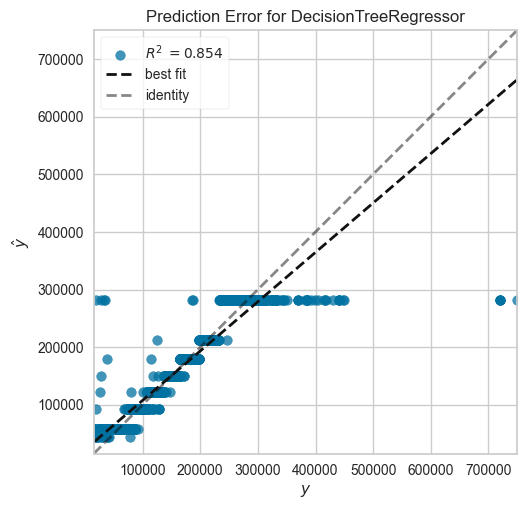

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [86]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


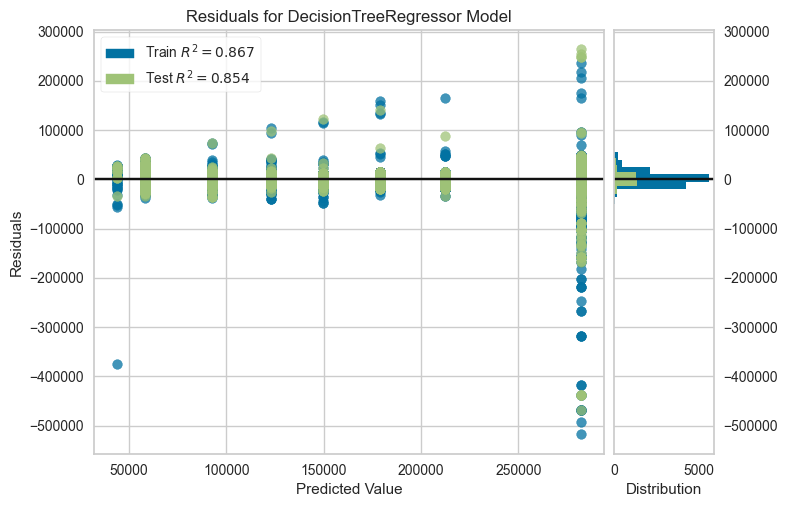

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [87]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()